In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [28]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [29]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

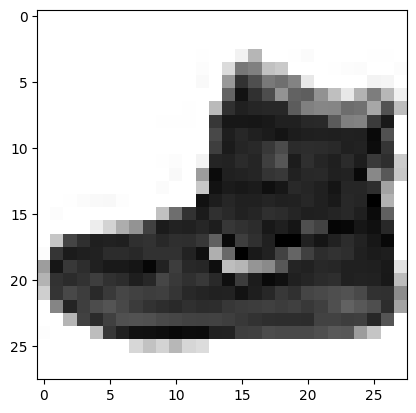

In [30]:
plt.imshow(train_data[0], cmap = plt.cm.binary);

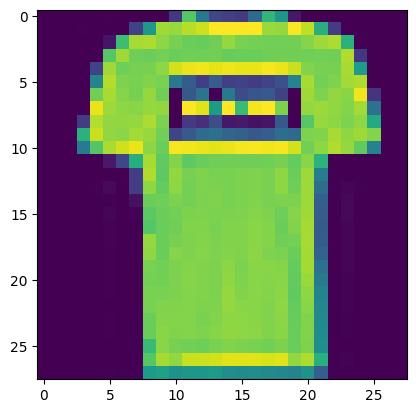

In [31]:
plt.imshow(train_data[1]);

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

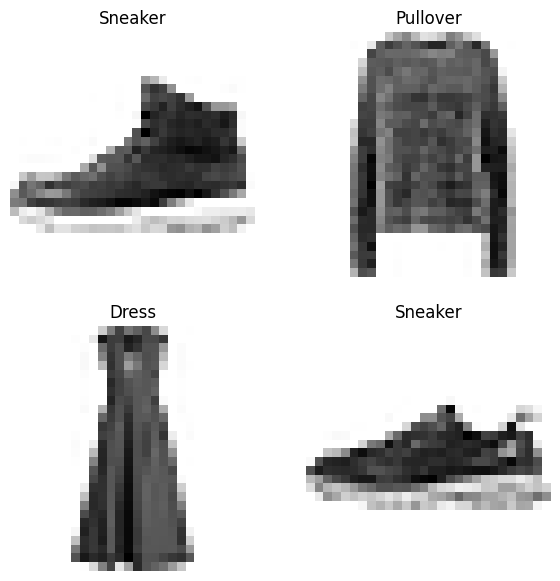

In [33]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with `28x28 tensors` (the height and width of our images).
  * We're actually going to `squash` the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be `10` because we need our model to predict for **10 different classes**.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1). The index with the highest value is predicted by the model to be the most **likely** class.
* We'll need to change our loss function from a `binary loss function to a multiclass loss function`.
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.

In [36]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1142 - loss: 2.5776 - val_accuracy: 0.1618 - val_loss: 2.1515
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.1684 - loss: 2.1420 - val_accuracy: 0.2089 - val_loss: 2.0535
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.2199 - loss: 1.9327 - val_accuracy: 0.2344 - val_loss: 1.7567
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.2321 - loss: 1.7510 - val_accuracy: 0.2325 - val_loss: 1.7221
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.2376 - loss: 1.7213 - val_accuracy: 0.2690 - val_loss: 1.6856
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.2689 - loss: 1.6796 - val_accuracy: 0.2904 - val_loss: 1.6523
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.2956 - loss: 1.6350 - val_accuracy: 0.3034 - val_loss: 1.6082
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.3068 - l

In [37]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [38]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [39]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [40]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_2.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

c:\Deep_Learning\TensorFlow_For_Deep_Learning\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 938us/step - accuracy: 0.4042 - loss: 1.6309 - val_accuracy: 0.7006 - val_loss: 0.7699
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.7181 - loss: 0.7339 - val_accuracy: 0.7367 - val_loss: 0.7038
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.7522 - loss: 0.6715 - val_accuracy: 0.7622 - val_loss: 0.6566
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.7734 - loss: 0.6302 - val_accuracy: 0.7731 - val_loss: 0.6316
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.7865 - loss: 0.6022 - val_accuracy: 0.7798 - val_loss: 0.6176
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.7943 - loss: 0.5844 - val_accuracy: 0.7856 - val_loss: 0.6083
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.7992 - loss: 0.5715 - val_accuracy: 0.7912 - val_loss: 0.5986
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.8034 -

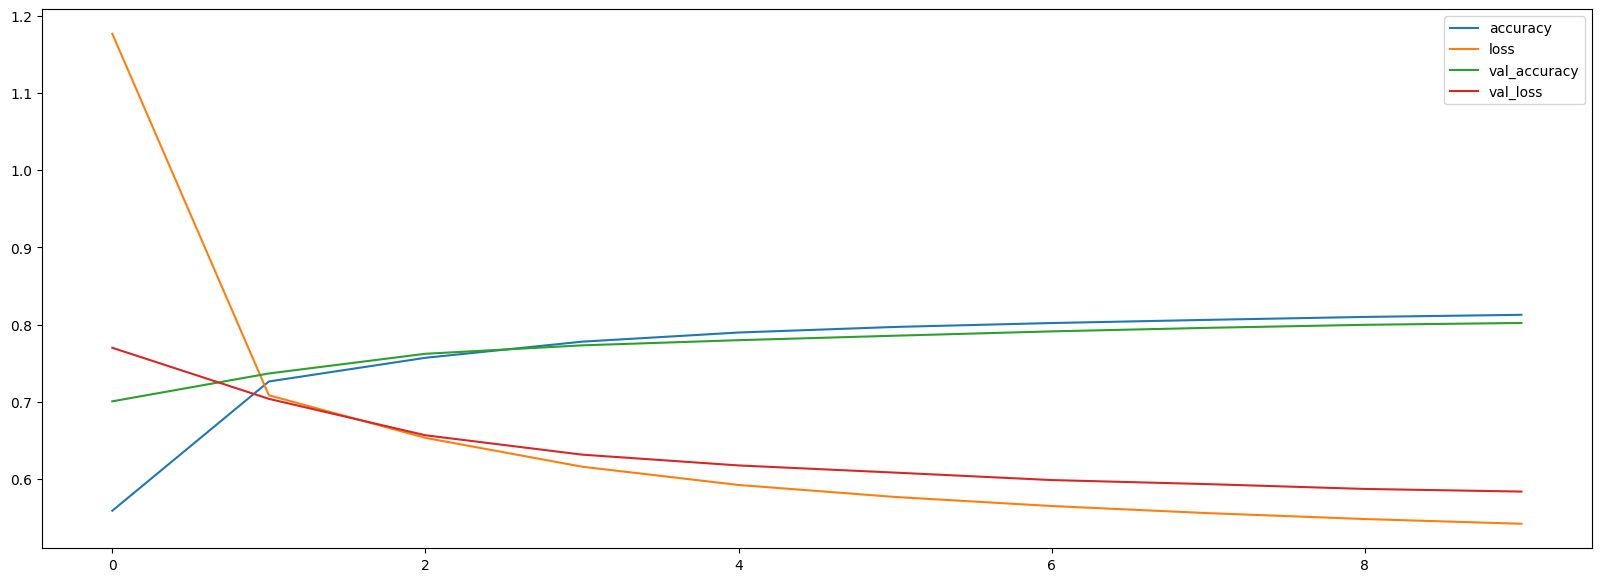

In [48]:
pd.DataFrame(norm_history.history).plot(figsize = (20, 7));